## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

!pip install lifetimes
import lifetimes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, median_absolute_error

## Load data

In [2]:
data_clv = pd.read_csv("MobileGame.csv", encoding="unicode_escape", parse_dates=['install_cohort'])

## Explotary Data Analysis

In [3]:
data_clv.head()

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu
0,2015-03-01,42,14468.137796,289,14468.137796,50.062761
1,2015-03-01,60,764.962165,289,15233.099961,52.709688
2,2015-03-01,68,34405.084055,289,49638.184016,171.758422
3,2015-03-01,69,17729.292290,289,67367.476306,233.105454
4,2015-03-01,76,33442.650453,289,100810.126759,348.823968


In [4]:
# General Description
data_clv.describe()

,days_since_install,revenue,total_installs,cum_rev,arpu
count,67560.000000,6.756000e+04,6.756000e+04,6.756000e+04,67560.000000
mean,283.552043,1.528436e+05,1.053914e+06,6.821477e+07,67.556784
std,237.915083,2.045282e+05,6.084626e+05,4.342732e+07,37.354955
min,-792.000000,9.490132e+01,1.490000e+02,9.490132e+01,0.000035
25%,96.000000,3.543917e+04,7.918640e+05,4.037755e+07,44.370281
50%,250.000000,8.122211e+04,9.600220e+05,6.757673e+07,69.593133
75%,450.000000,1.815443e+05,1.094166e+06,9.227602e+07,89.670680
max,926.000000,4.261046e+06,5.439207e+06,2.790897e+08,596.550548


In [5]:
print("There are only numeric and date variables in the dataset w/o categorical variables.")
print("It presents negative values in days_since_install columns, which doesn't make logical sense.")

There are only numeric and date variables in the dataset w/o categorical variables.
It presents negative values in days_since_install columns, which doesn't make logical sense.


In [6]:
# Remove fallacious rows with negative values on days since install
data_clv = data_clv[data_clv['days_since_install'] > 0]

In [7]:
data_clv.describe()

,days_since_install,revenue,total_installs,cum_rev,arpu
count,62911.000000,6.291100e+04,6.291100e+04,6.291100e+04,62911.000000
mean,311.500135,1.604166e+05,1.058900e+06,7.324072e+07,72.533024
std,219.907904,1.970891e+05,6.236243e+05,4.072094e+07,33.743548
min,1.000000,9.490132e+01,1.490000e+02,2.866212e+02,0.048981
25%,126.000000,4.321557e+04,7.968120e+05,4.790186e+07,50.573839
50%,274.000000,8.842503e+04,9.600220e+05,7.018618e+07,72.364605
75%,467.000000,1.928587e+05,1.127966e+06,9.415616e+07,91.363196
max,926.000000,3.475016e+06,5.439207e+06,2.790897e+08,596.550548


In [8]:
# Check on Missing Values
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Percentage'], index=data_clv.columns)

,Count,Percentage
install_cohort,0,0.0
days_since_install,0,0.0
revenue,0,0.0
total_installs,0,0.0
cum_rev,0,0.0
arpu,0,0.0


In [9]:
print("Good news: There are no missing values in the data set!")

Good news: There are no missing values in the data set!


In [10]:
# Check on time range of install cohort date
maxdate = data_clv['install_cohort'].dt.date.max()
mindate = data_clv['install_cohort'].dt.date.min()
print(f"The Time range of Install Cohort are: {mindate} to {maxdate}")

The Time range of Install Cohort are: 2015-03-01 to 2017-10-15


In [11]:
# Check on the the largest 'days since install' by install cohort
customer = data_clv.groupby('install_cohort').agg({'days_since_install': lambda x: max(x)})
customer

,days_since_install
install_cohort,
2015-03-01,910
2015-03-08,678
2015-03-15,505
2015-03-22,445
2015-03-29,921
...,...
2017-09-17,35
2017-09-24,28
2017-10-01,21


### Business Question One: Which cohort has the highest total_installs, arpu and cumulative revenue? 

In [12]:
# Merge data to only keep rows with the cumulative information of each cohort
data_update = pd.merge(data_clv, customer, on=['install_cohort', 'days_since_install'])
data_update

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu
0,2015-03-01,910,18589.155777,289,1.724031e+05,596.550548
1,2015-03-08,678,9679.934769,149,4.810730e+04,322.867793
2,2015-03-15,505,4792.037424,635,3.419448e+05,538.495745
3,2015-03-22,445,478.341003,5989,3.256745e+04,5.437878
4,2015-03-29,921,1916.239810,19512,2.953151e+06,151.350493
...,...,...,...,...,...,...
133,2017-09-17,35,48560.718510,736576,1.755889e+07,23.838537
134,2017-09-24,28,46340.602752,653379,1.221610e+07,18.696811
135,2017-10-01,21,58807.185408,576633,9.558089e+06,16.575689
136,2017-10-08,14,75283.588538,541017,7.840038e+06,14.491297


In [13]:
# Top 10 total installs, ARPU and cumulative revenue are ranked in descending order by install cohorts
top_installs = data_update.sort_values(by=['total_installs'], ascending=False).head(10)
top_cumrev = data_update.sort_values(by=['cum_rev'], ascending=False).head(10)
top_arpu = data_update.sort_values(by=['arpu'], ascending=False).head(10)

### Install Cohort 2015–04–12 has the most total installs, with more than 5MM in 7 days. The total installs are more than two times of the rest of install cohorts.

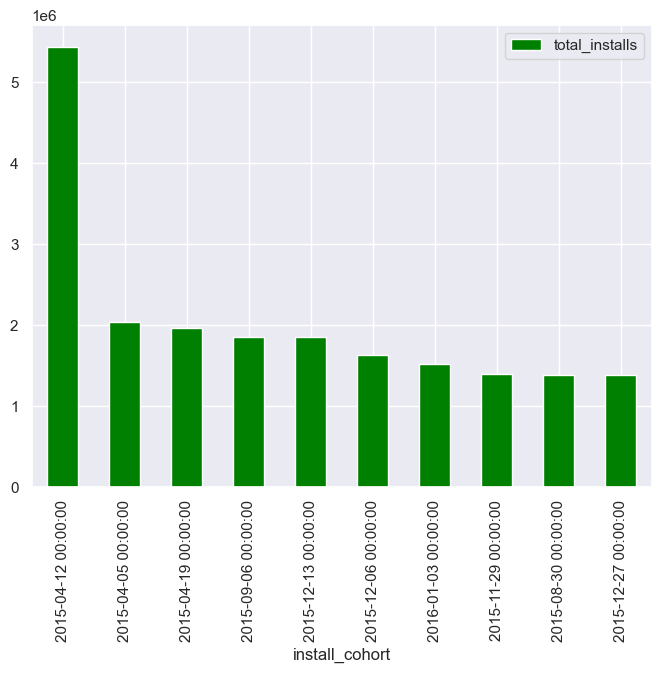

In [14]:
top_installs.plot(x="install_cohort", y="total_installs", kind="bar",figsize=(8,6), color = 'green')
plt.show()

### Install Cohort 2015–03–01 has the highest ARPU, at about 600. The 2015–03–15 cohort's ARPU is less than 100 lower than 03–01 one.

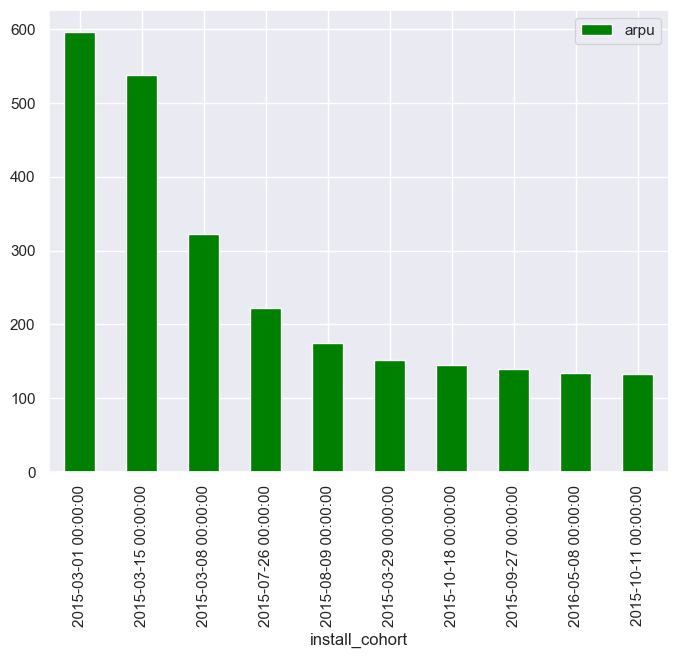

In [15]:
top_arpu.plot(x="install_cohort", y="arpu", kind="bar",figsize=(8,6), color = 'green')
plt.show()

### Install Cohort 2015–07–26 has the highest cumulative revenue, followed by 2015–04–12 and 2015–08–09 cohorts.

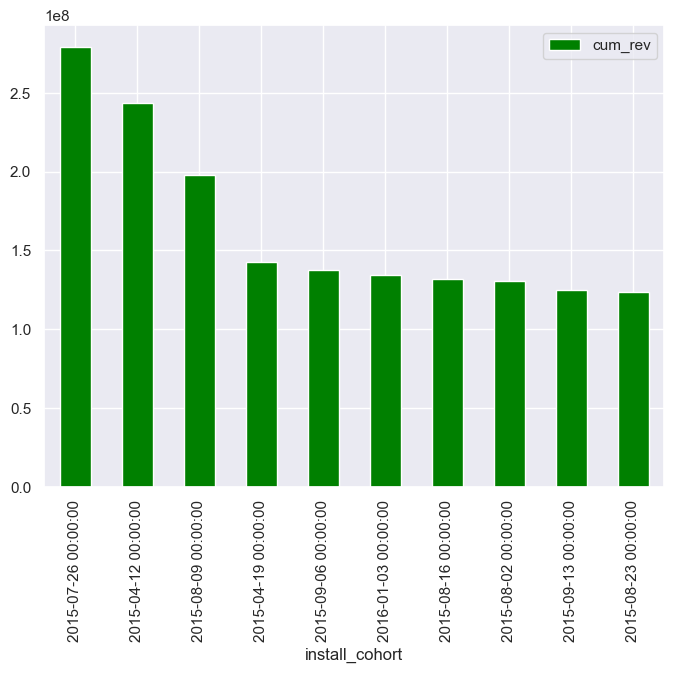

In [16]:
top_cumrev.plot(x="install_cohort", y="cum_rev", kind="bar",figsize=(8,6), color = 'green')
plt.show()

### In general, 2015 install cohorts have the highest amount of installs, ARPU and cumulative revenue among all years (2015, 16 & 17), which might be a result of novelty effect when the mobile game just launched into the market.

## CLV Analysis

#### The General Formula for calculating CLV is:
#### CLV = ((Average Revenue X Transaction Frequency) / Churn) X Profit Margin
#### Where,
#### Average Revenue = Average revenue of transactions per install cohort
#### Transaction Frequency = Average no. of transactions per install cohort
#### Retention rate = Based on business context / Total unique install cohorts
#### Churn = 1 - Retention rate
#### Profit Margin = Based on business context
#### In this case, I am assuming the an install cohort will retain only when ARPU is larger 
#### than 100; profit margin for each transaction to be roughly 5%

### Business Question Two: What's the average CLV of all the install cohorts? 

In [17]:
# Aggregate Model
# calculating the CLV by using the average revenue per cohort.
# This method gives us a single value for the CLV of all cohorts
# This assumes a constant average spend and churn rate for all cohorts.

In [18]:
# Transforming the data to cohort level for the analysis
cohort = data_clv.groupby('install_cohort').agg({ 'install_cohort': lambda x: len(x),
                                                  'revenue': lambda x: sum(x)/len(x)})

cohort.columns = ['Frequency', 'AverageRevenue']
cohort

,Frequency,AverageRevenue
install_cohort,,
2015-03-01,10,17240.310836
2015-03-08,4,12026.825272
2015-03-15,33,10361.963579
2015-03-22,24,1356.977057
2015-03-29,508,5813.289012
...,...,...
2017-09-17,35,451185.667914
2017-09-24,28,381462.091706
2017-10-01,21,391853.900503


In [19]:
# Calculating the necessary variables for CLV calculation
Average_revenue = round(np.mean(cohort['AverageRevenue']),2)
print(f"Average revenue: ${Average_revenue}")

Revenue_freq = round(np.mean(cohort['Frequency']), 2)
print(f"Revenue Frequency: {Revenue_freq}")

retention_rate = data_update[data_update['arpu']>100].shape[0]/data_clv.shape[0]
churn = round(1 - retention_rate, 2)
print(f"Churn: {churn}%")

Average revenue: $187740.91
Revenue Frequency: 455.88
Churn: 1.0%


In [20]:
# Assume 5% of the total revenue 
Profit_margin = 0.05 

CLV = round(((Average_revenue * Revenue_freq/churn)) * Profit_margin, 2)
CLV

4279366.3

### From our basic formula above, the average CLV for each cohort is: $4.28MM 

### Business Question Three: Install cohorts of which month has the highest average CLV?

In [21]:
# Cohort Model
# The main assumption of this model is that, install cohorts in the same months have similar churn rates

In [22]:
# Transforming the data to customer level for the analysis
cohort = data_clv.groupby('install_cohort').agg({'install_cohort':lambda x: x.min().month, 
                                                 'days_since_install': lambda x: len(x),
                                                 'revenue': lambda x: sum(x)/len(x),
                                                 'arpu': lambda x: max(x)})

cohort.columns = ['Install_Month', 'Frequency', 'AverageRevenue','ARPU']
cohort.head()

,Install_Month,Frequency,AverageRevenue,ARPU
install_cohort,,,,
2015-03-01,3,10,17240.310836,596.550548
2015-03-08,3,4,12026.825272,322.867793
2015-03-15,3,33,10361.963579,538.495745
2015-03-22,3,24,1356.977057,5.437878
2015-03-29,3,508,5813.289012,151.350493


In [23]:
# Calculating CLV for each month
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    cohort_m = cohort[cohort['Install_Month']==i]
    
    Average_revenue = round(np.mean(cohort_m['AverageRevenue']),2)
    
    Frequency = round(np.mean(cohort_m['Frequency']), 2)
    
    Retention_rate = cohort_m[cohort_m['ARPU']>100].shape[0]/cohort_m.shape[0]
    
    churn = round(1 - Retention_rate, 2)
        
    CLV = round(((Average_revenue * Frequency/churn)) * Profit_margin, 2)
    Monthly_CLV.append(CLV)
Monthly_CLV

[6584838.81,
 6063912.27,
 2192341.23,
 4904186.82,
 4440114.21,
 5200707.51,
 4733173.92,
 9536450.8,
 10593941.6,
 14792769.73,
 7317636.15,
 4674378.46]

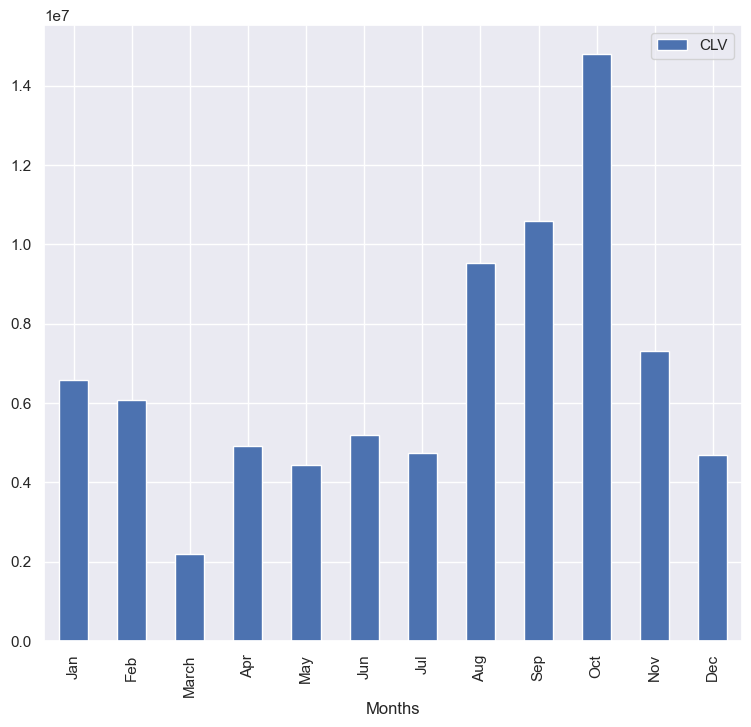

In [24]:
# Plot the average CLV for each month
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
monthly_clv.plot(x="Months", y="CLV", kind="bar",figsize=(9,8))
plt.show()

### The results indicate that install cohorts who are in different months have different CLV values attached to them. The latter half of the year has higher CLV than the first half. Among all months, CLV of Oct install cohort is the highest at about 15MM whereas March cohort has the lowest CLV at merely 2MM. This is probably because they could be acquired using different campaigns, etc., so their behavior might be different from others.

### Business Question Four: What is the total estmiated CLV for the next one year of all install cohorts? 

In [25]:
# Probability Model 
# BG/NBD stands for Beta Geometric/Negative Binomial Distribution.
# This is one of the most commonly used probabilistic model for predicting the CLV.
# To be precise, BG/NBD model actually tries to predict the future transactions  of each customer (install cohort). 
# It is then combined with Gamma-Gamma model, which then adds the monetary aspect of the customer transaction (revenue) 
# and we finally get the total customer lifetime value (CLV).


In [26]:
# create a new column 'install_month'
data_clv['install_month'] = data_clv['install_cohort'].dt.month

In [27]:
# create a new column 'billing_date' = install_cohort + days_since_install
data_clv['billing_date'] = pd.to_datetime(data_clv['install_cohort'])+pd.to_timedelta(data_clv['days_since_install'],unit = 'd')

In [28]:
data_clv.head(20)

,install_cohort,days_since_install,revenue,total_installs,cum_rev,arpu,install_month,billing_date
0,2015-03-01,42,14468.137796,289,14468.137796,50.062761,3,2015-04-12
1,2015-03-01,60,764.962165,289,15233.099961,52.709688,3,2015-04-30
2,2015-03-01,68,34405.084055,289,49638.184016,171.758422,3,2015-05-08
3,2015-03-01,69,17729.292290,289,67367.476306,233.105454,3,2015-05-09
4,2015-03-01,76,33442.650453,289,100810.126759,348.823968,3,2015-05-16
5,2015-03-01,77,9585.033447,289,110395.160207,381.990174,3,2015-05-17
6,2015-03-01,108,9585.033447,289,119980.193654,415.156379,3,2015-06-17
7,2015-03-01,132,9585.033447,289,129565.227101,448.322585,3,2015-07-11
8,2015-03-01,613,24248.725481,289,153813.952583,532.228210,3,2016-11-03
9,2015-03-01,910,18589.155777,289,172403.108359,596.550548,3,2017-08-27


In [29]:
# Get install_cohort, billing_date, revenue columns
features = ['install_cohort', 'billing_date', 'revenue']
data_clv_prob = data_clv[features]
data_clv_prob.head(20)

,install_cohort,billing_date,revenue
0,2015-03-01,2015-04-12,14468.137796
1,2015-03-01,2015-04-30,764.962165
2,2015-03-01,2015-05-08,34405.084055
3,2015-03-01,2015-05-09,17729.292290
4,2015-03-01,2015-05-16,33442.650453
5,2015-03-01,2015-05-17,9585.033447
6,2015-03-01,2015-06-17,9585.033447
7,2015-03-01,2015-07-11,9585.033447
8,2015-03-01,2016-11-03,24248.725481
9,2015-03-01,2017-08-27,18589.155777


In [ ]:
# Recency, Frequency, Time and monetary_value
"""
frequency - the number of repeat revenue (more than 1 revenue)
recency - the time between the first and the last revenue
T - the time between the install date and the end of the revenue period
monetary_value - it is the mean of a given install cohort's revenue
"""

summary = lifetimes.utils.summary_data_from_transaction_data(data_clv_prob, 'install_cohort', 'billing_date', 'revenue',\
                                                            include_first_transaction=False)
summary = summary.reset_index()
summary

In [ ]:
# Create a distribution of frequency
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())

In [ ]:
#### Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.6)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

In [ ]:
# Model summary
bgf.summary

In [ ]:
# Compute the cohort retention (1-churn%) probability
summary['retention_rate'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head()

In [ ]:
#Predict future transaction for the next one year based on historical data
t = 365
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.head(10)

In [ ]:
# Checking the relationship between frequency and monetary_value
summary[['frequency', 'monetary_value']].corr()

In [ ]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(summary['frequency'],
       summary['monetary_value'])

In [ ]:
ggf.summary

In [ ]:
# Calculating the conditional expected average profit for each install cohort
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_revenue'] = ggf.conditional_expected_average_profit(summary['frequency'], summary['monetary_value'])
summary.head()

In [ ]:
summary['CLV_365'] = summary['pred_num_txn'] * summary['exp_avg_revenue'] * Profit_margin
summary.head()

In [ ]:
# Distribution of CLV for the business in the next 365 days
summary['CLV_365'].describe()

In [ ]:
# Total CLV for the business in the next 365 days
summary['CLV_365'].sum()

### According to Probability Model, the total CLV in next year of all the exisiting install cohorts are 459MM approximately. 

### Business Question Five: Which behavior has influence on CLV of each install cohort? What are the relationship? 

In [ ]:
# Machine Learning Model

In [ ]:
# Read data
# data_clv = pd.read_csv('MobileGame.csv')
data_clv = pd.read_csv("MobileGame.csv", encoding="unicode_escape", parse_dates=['install_cohort'])
data_clv.head()

In [ ]:
## We are going to determine basic information about each cohort's average 
## lifetime revenue amount, as well as each cohort’s duration and frequency of revenue.

# Create functions
def groupby_sum(x):
    return x.sum()

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def total_duration(x):
    return (x.max() - x.min())

def avg_duration(x):
    return (x.max() - x.min()) / x.count()

groupby_sum.__name__ = 'sum'
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
total_duration.__name__ = 'total_duration'
avg_duration.__name__ = 'avg_duration'

In [ ]:
# Create a summary using df to calculate the followings of install cohort
## Revenue (min, max)
## Days since install (min, max)

data_clv_summary = data_clv.reset_index().groupby('install_cohort').agg({
            'revenue': [groupby_sum, groupby_count],
            'days_since_install': [min, max, total_duration, avg_duration],
            'total_installs': [groupby_mean]
             })

data_clv_summary.head()

In [ ]:
data_clv_summary.columns=data_clv_summary.columns.droplevel(0)
data_clv_summary.columns

In [ ]:
data_clv_summary.rename(columns={'sum': 'revenue_sum',
         'count': 'frequency', 'min': 'recency', 'max': 'days_since_install_max', 
         'total_duration': 'total_duration', 'avg_duration': 'avg_duration', 'avg': 'total_installs'}, inplace = True)

data_clv_summary.head(10)

In [ ]:
# Correlation analysis 
corr = data_clv_summary.corr()
corr

In [ ]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
# Define target variable and features 
target_var = 'revenue_sum'
all_features = [x for x in data_clv_summary.columns if x not in ['install_cohort', 'revenue_sum']]
all_features

In [ ]:
# Split into train and test sets (25%)
X_train, X_test, y_train, y_test = train_test_split(data_clv_summary[all_features], data_clv_summary[target_var], random_state=2,test_size=0.25)


In [ ]:
# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
# Get coefficients for features
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [ ]:
# Get predictions
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

In [ ]:
# R-sqaure
r2_score(y_true = y_train, y_pred = train_preds)

In [ ]:
r2_score(y_true = y_test, y_pred = test_preds)

In [ ]:
# MedAE
median_absolute_error(y_true = y_train, y_pred=train_preds)

In [ ]:
median_absolute_error(y_true = y_test, y_pred=test_preds)

In [ ]:
# Scatter plot
# Build a scatter plot to compare actual and predicted values for a test set
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

###  Transaction frequency, number of days since install & total duration, total installs have strong positive relationship with CLV (revenue) of install cohort. Shorter duration between transaction of installs cohort correlates with higher CLV (revenue). Counter intuitively, an install cohort with more recent transaction is associated with smaller CLV (revenue), which might be due to the multicollinearity between recency and days since install. 
